In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('IRIS.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['species'])
x = StandardScaler().fit_transform(x)
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


PCA (implemented by me)

In [16]:
from classes import *
pca_ = PCA_(n_components=2)
pca_.x_train = pca_.fit_transform(x_train)
pca_.x_test = pca_.transform(x_test)

print(f"Variance ratio:\n {pca_.explained_variance_ratio_}")
print(f"PCs:\n {pca_.components_}")

Error occurred: ('Optimization error:', 'Positive directional derivative for linesearch')
Variance ratio:
 [0.72790474 0.23357964]
PCs:
 [[ 0.53599173 -0.35690451  0.72351432  0.24871483]
 [-0.22170273 -0.93362606 -0.25658369 -0.11556426]]


The directions of the 2 PCs, projected onto the first 2 features' space

Text(0, 0.5, 'sepal_width')

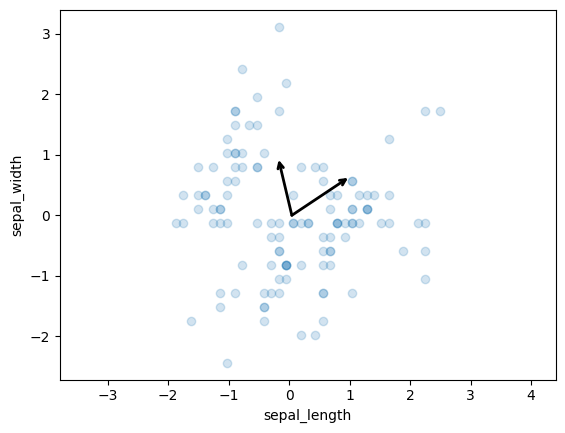

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.2)
for length, vector in zip(pca_.explained_variance_, pca_.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca_.mean_[:2], (pca_.mean_ + v)[:2])
plt.axis('equal')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Scree plot

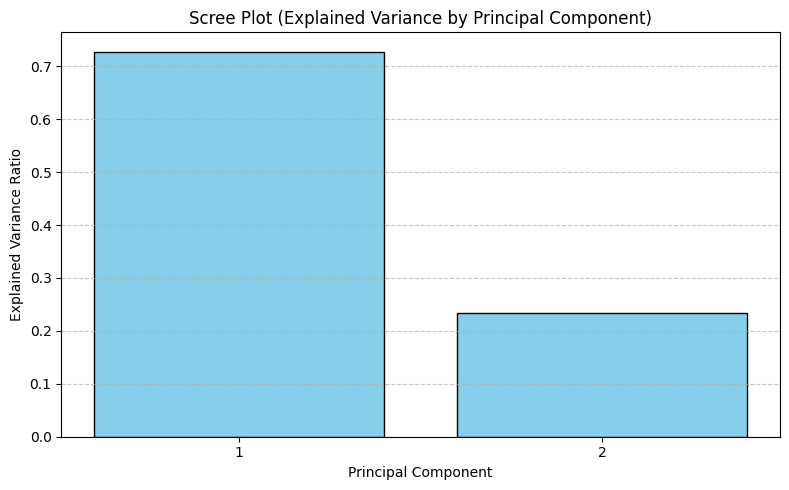

In [73]:
explained_var_ratio = pca_.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(
    x=np.arange(1, len(explained_var_ratio) + 1),
    height=explained_var_ratio,
    color='skyblue',
    edgecolor='black'
)
plt.title('Scree Plot (Explained Variance by Principal Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_var_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

data that got moved to the 2 PCs' space, now being projected onto the first 2 features' space

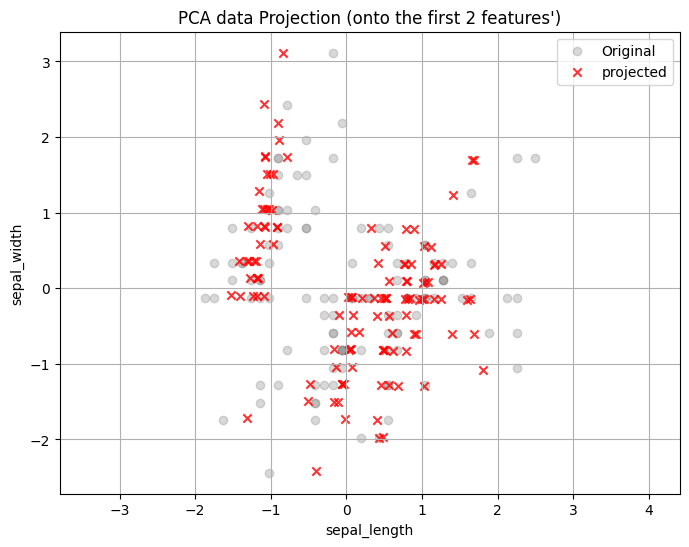

In [9]:
pca_.x_train_re = pca_.inverse_transform(pca_.x_train)
first = 0
second = 1
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, first], x_train[:, second], alpha=0.3, label="Original", c='gray')
plt.scatter(pca_.x_train_re[:, first], pca_.x_train_re[:, second], alpha=0.8, label="projected", c='red', marker='x')
plt.title("PCA data Projection (onto the first 2 features')")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

Model training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LOGR = LogisticRegression()
LOGR.fit(pca_.x_train, y_train)
LOGR_pred = LOGR.predict(pca_.x_test)
print(f'LOGR model accuracy (My PCA): {accuracy_score(y_test, LOGR_pred)}')

LOGR model accuracy (My PCA): 0.8666666666666667


PCA (sklearn's)

In [13]:
from classes import *
pca = PCA(n_components=2)
pca.x_train = pca.fit_transform(x_train)
pca.x_test = pca.transform(x_test)

print(f"Variance ratio:\n {pca.explained_variance_ratio_}")
print(f"PCs:\n {pca.components_}")

Variance ratio:
 [0.72790474 0.23357964]
PCs:
 [[ 0.53599185 -0.22170254  0.58074928  0.57121886]
 [ 0.35690425  0.93362615 -0.00330994  0.03083191]]


The directions of the 2 PCs, projected onto the first 2 features' space

Text(0, 0.5, 'sepal_width')

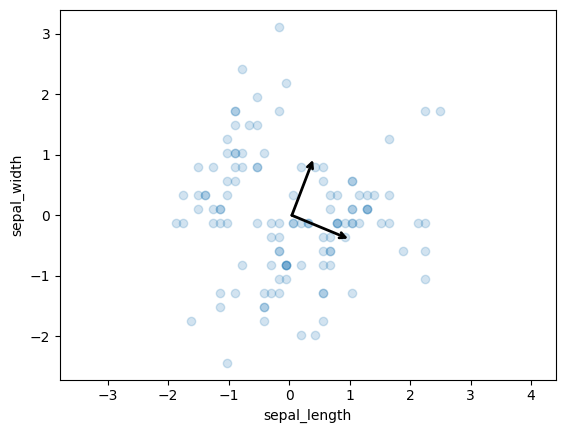

In [14]:
# plot data
plt.scatter(x_train[:, 0], x_train[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_[:2], (pca.mean_ + v)[:2])
plt.axis('equal')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

Scree plot

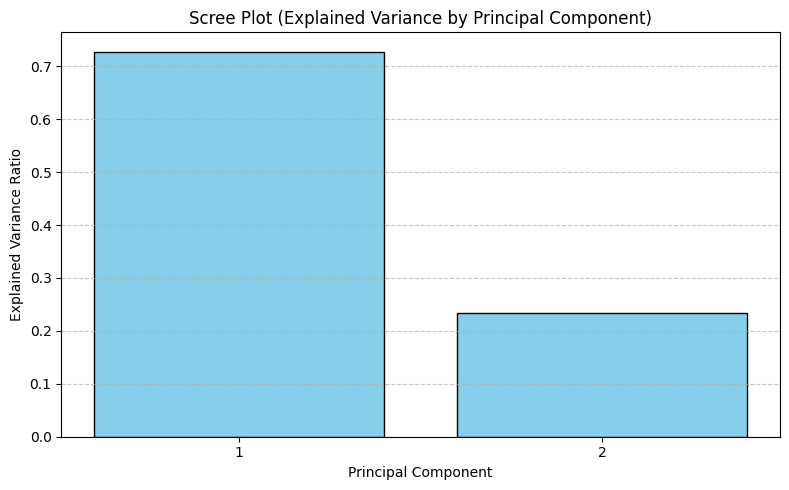

In [15]:
explained_var_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(
    x=np.arange(1, len(explained_var_ratio) + 1),
    height=explained_var_ratio,
    color='skyblue',
    edgecolor='black'
)
plt.title('Scree Plot (Explained Variance by Principal Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_var_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

data that got moved to the 2 PCs' space, now being projected onto the first 2 features' space

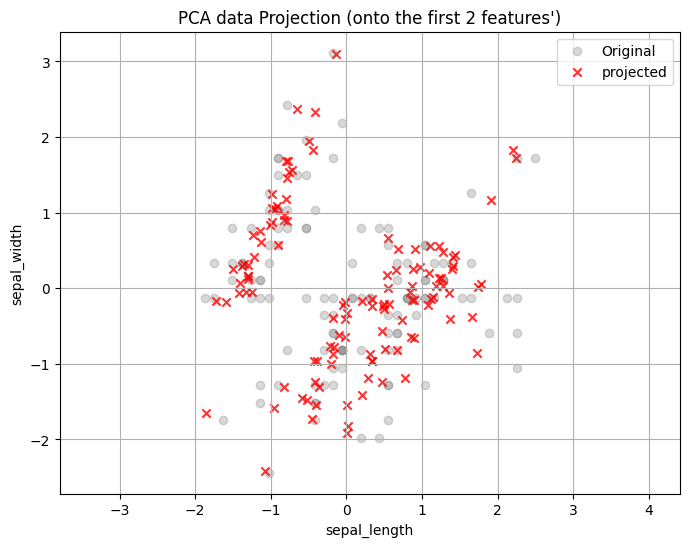

In [16]:
pca.x_train_re = pca.inverse_transform(pca.x_train)
first = 0
second = 1
plt.figure(figsize=(8, 6))
plt.scatter(x_train[:, first], x_train[:, second], alpha=0.3, label="Original", c='gray')
plt.scatter(pca.x_train_re[:, first], pca.x_train_re[:, second], alpha=0.8, label="projected", c='red', marker='x')
plt.title("PCA data Projection (onto the first 2 features')")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

Model training

In [17]:
LOGR = LogisticRegression()
LOGR.fit(pca.x_train, y_train)
LOGR_pred = LOGR.predict(pca.x_test)
print(f'LOGR model accuracy (My PCA): {accuracy_score(y_test, LOGR_pred)}')

LOGR model accuracy (My PCA): 0.8666666666666667
